In [106]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Desktop/Resources/city_data.csv"
ride_data_to_load = "Desktop/Resources/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

#df_city.head()

# Combine the data into a single dataset
df_city_rides = pd.merge(df_city, df_ride, on="city")
# Display the data table for preview
df_city_rides.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/18 8:40,13.93,5.630000e+12
1,Richardfort,38,Urban,2/13/18 12:46,14.00,9.100000e+11
2,Richardfort,38,Urban,2/16/18 13:52,17.92,8.210000e+11
3,Richardfort,38,Urban,2/1/18 20:18,10.26,9.550000e+12
4,Richardfort,38,Urban,4/17/18 2:26,23.00,7.200000e+11


In [107]:
#merged_df = pd.merge(df_ride, df_city, how="left", on ="city")
#merged_df.head()

In [108]:
#divide by group
df_rural = df_city_rides.loc[df_city_rides["type"] == "Rural"]
df_sub = df_city_rides.loc[df_city_rides["type"] == "Suburban"]
df_urban = df_city_rides.loc[df_city_rides["type"] == "Urban"]

df_rural.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,4/1/18 9:32,21.63,9.140000e+12
2251,South Jennifer,7,Rural,3/7/18 19:10,48.79,9.730000e+12
2252,South Jennifer,7,Rural,4/5/18 14:35,32.20,6.840000e+11
2253,South Jennifer,7,Rural,4/2/18 10:26,14.11,3.830000e+12
2254,South Jennifer,7,Rural,4/10/18 20:46,43.25,6.240000e+11


In [109]:
# Groupby_city
rural_by_city = df_rural.groupby(["city"])
sub_by_city = df_sub.groupby(["city"])
urban_by_city = df_urban.groupby(["city"])

#rural_by_city.head()

In [110]:
# rides per city
rural_rides_city = rural_by_city.ride_id.count()
sub_rides_city = sub_by_city.ride_id.count()
urban_rides_city = urban_by_city.ride_id.count()

rural_per_city.head()

city
Bradshawfurt      400.64
Garzaport          72.37
Harringtonfort    200.82
Jessicaport       216.08
Lake Jamie        206.15
Name: fare, dtype: float64

In [111]:
#rides PER city
rural_per_city = rural_by_city.fare.sum()
sub_per_city = sub_by_city.fare.sum()
urban_per_city = urban_by_city.fare.sum()

rural_per_city.head()

city
Bradshawfurt      400.64
Garzaport          72.37
Harringtonfort    200.82
Jessicaport       216.08
Lake Jamie        206.15
Name: fare, dtype: float64

In [112]:
#Mean
rural_mean = rural_per_city / rural_rides_city
sub_mean = sub_per_city / sub_rides_city
urban_mean = urban_per_city / urban_rides_city

rural_mean.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
dtype: float64

In [113]:
df_city = df_city.set_index(["city"])
df_city_index = df_city.sort_index()

df_city_index.head()

,driver_count,type
city,,
Amandaburgh,12,Urban
Barajasview,26,Urban
Barronchester,11,Suburban
Bethanyland,22,Suburban
Bradshawfurt,7,Rural


In [114]:
#Bobbles 1
df_city_rural = df_city_index.loc[df_city_index["type"] == "Rural"]
df_city_sub = df_city_index.loc[df_city_index["type"] == "Suburban"]
df_city_urban = df_city_index.loc[df_city_index["type"] == "Urban"]

df_city_rural.head()

,driver_count,type
city,,
Bradshawfurt,7,Rural
Garzaport,7,Rural
Harringtonfort,4,Rural
Jessicaport,1,Rural
Lake Jamie,4,Rural


In [115]:
#bubbles 2
rural_bubbles = df_city_rural["driver_count"] * 5
sub_bubbles = df_city_sub["driver_count"] * 5
urban_bubbles = df_city_urban["driver_count"] * 5

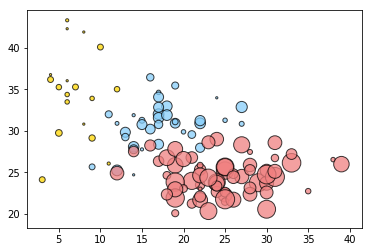

In [116]:
#Graph
rural_graph = plt.scatter(rural_rides_city, rural_mean, marker="o", c='gold', edgecolors="black", s=rural_bubbles, alpha=0.75, label="Rural")
sub_graph = plt.scatter(sub_rides_city, sub_mean, marker="o", c='lightskyblue', edgecolors="black", s=sub_bubbles, alpha=0.75, label="Suburban")
urban_graph = plt.scatter(urban_rides_city, urban_mean, marker="o", c='lightcoral', edgecolors="black", s=urban_bubbles, alpha=0.75, label="Urban")


Text(22, 40, 'Note:\nThe size = number of drivers per city.')

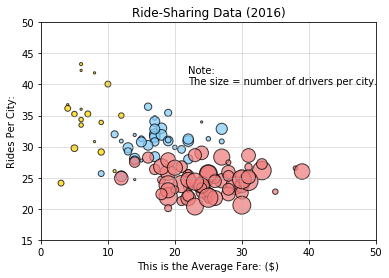

In [117]:
#Make it pretty
rural_graph = plt.scatter(rural_rides_city, rural_mean, marker="o", c='gold', edgecolors="black", s=rural_bubbles, alpha=0.75, label="Rural")
sub_graph = plt.scatter(sub_rides_city, sub_mean, marker="o", c='lightskyblue', edgecolors="black", s=sub_bubbles, alpha=0.75, label="Suburban")
urban_graph = plt.scatter(urban_rides_city, urban_mean, marker="o", c='lightcoral', edgecolors="black", s=urban_bubbles, alpha=0.75, label="Urban")


plt.ylim(15, 50)
plt.xlim(0, 50)
plt.grid(axis='both', alpha=0.5)
plt.xlabel("This is the Average Fare: ($)")
plt.ylabel("Rides Per City:")
plt.title("Ride-Sharing Data (2016)")
plt.text(x=22, y=40, s='Note:\nThe size = number of drivers per city.')

In [118]:
plt.savefig("city_fares_scatter_plot.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [119]:
fares_total = df_city_rides["fare"].sum()
fares_total

63538.64

In [120]:
#dividing the fare types
fare_types = df_city_rides.groupby("type")
fares_by_type = fare_types.fare.sum()
percent_by_type = (fares_by_type * 100) / fares_total

fares_by_type.head()
percent_by_type.head()

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

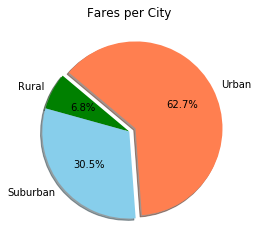

In [121]:
#Pie Chart 1
labels = ["Rural", "Suburban", "Urban"]
#sizes = [6.8, 30.5, 62.7]
colors = ["green", "skyblue", "coral"]
explode = (0, 0, 0.08)
plt.pie(percent_by_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#save + show
plt.savefig("pyber_pie_type.png")
plt.title('Fares per City')
plt.show()

In [122]:
# rides_total = df_city_rides["ride_id"].sum()
#fares_total
#dividing the fare types
#rides_types = df_city_rides.groupby("type")
#rides_by_type = rides_types.ride_id.count()
#percent_of_rides = (rides_by_type * 100) / rides_total

#rides_by_type.head()
# percent_of_rides.head()

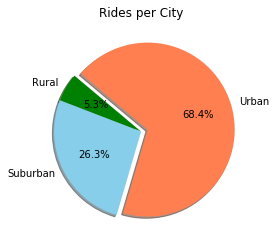

In [123]:
rides_total = df_city_rides["ride_id"].count()
#fares_total
#dividing the fare types
rides_types = df_city_rides.groupby("type")
rides_by_type = rides_types.ride_id.count()
percent_of_rides = (rides_by_type * 100) / rides_total

#rides_by_type.head()
#percent_of_rides.head()

#Pie Chart 2
labels = ["Rural", "Suburban", "Urban"]
#sizes = [6.8, 30.5, 62.7]
colors = ["green", "skyblue", "coral"]
explode = (0, 0, 0.08)
plt.pie(percent_of_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#save + show
plt.savefig("pyber_pie_rides.png")
plt.title('Rides per City')
plt.show()

In [124]:
percent_of_rides

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

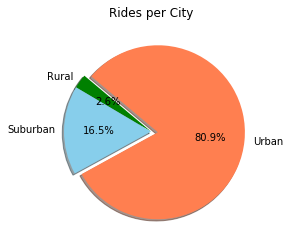

In [129]:
# dividing drivers
rural_drivers = df_city_rural['driver_count'].sum()
sub_drivers = df_city_sub['driver_count'].sum()
urban_drivers = df_city_urban['driver_count'].sum()

drivers_total = rural_drivers + sub_drivers + urban_drivers

drivers_city = df_city.groupby("type")
driver_count_by_type = drivers_city.driver_count.sum()
percent_driver_count_by_type = (driver_count_by_type * 100) / drivers_total

#drivers_city.head()
#percent_driver_count_by_type.head()

labels = ["Rural", "Suburban", "Urban"]
#sizes = [6.8, 30.5, 62.7]
colors = ["green", "skyblue", "coral"]
explode = (0, 0, 0.08)
plt.pie(percent_driver_count_by_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#save + show
plt.savefig("percent_driver_count_by_type.png")
plt.title('Rides per City')
plt.show()
